In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# To avoid the kernel dead state
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
# path to training and vaildation data
train_dir = "train"
val_dir = "val"
test_dir = "test"

image_size = (150, 150)    # target image size
batch_size = 64

In [4]:
train_datagen = ImageDataGenerator(
                      rotation_range=40,
                      width_shift_range=.2,
                      height_shift_range=.2,
                      shear_range=.2,
                      zoom_range=.2,
                      horizontal_flip=True,
                      fill_mode='nearest'
                  )

train_ds = train_datagen.flow_from_directory(
                                                directory=train_dir,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                target_size=(150, 150), 
                                                seed = 43
                                            )

Found 3019 images belonging to 5 classes.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    seed=43,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=43,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
)

Found 649 files belonging to 5 classes.
Found 649 files belonging to 5 classes.


# Model - 8 - Data Augmentation

In [6]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(64, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(256, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(512, (3, 3), activation="relu")(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_8 = keras.Model(inputs, outputs)

In [7]:
model_8.compile(loss="categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_8 = model_8.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
48/48 [==============================] - 61s 1s/step - loss: 1.5906 - accuracy: 0.3299 - val_loss: 1.2827 - val_accuracy: 0.4669
Epoch 2/20
48/48 [==============================] - 68s 1s/step - loss: 1.3189 - accuracy: 0.4187 - val_loss: 1.2254 - val_accuracy: 0.4468
Epoch 3/20
48/48 [==============================] - 69s 1s/step - loss: 1.2307 - accuracy: 0.4810 - val_loss: 1.1237 - val_accuracy: 0.5501
Epoch 4/20
48/48 [==============================] - 71s 1s/step - loss: 1.1503 - accuracy: 0.5349 - val_loss: 0.9683 - val_accuracy: 0.6317
Epoch 5/20
48/48 [==============================] - 68s 1s/step - loss: 1.0743 - accuracy: 0.5740 - val_loss: 0.9324 - val_accuracy: 0.6271
Epoch 6/20
48/48 [==============================] - 67s 1s/step - loss: 1.0123 - accuracy: 0.6015 - val_loss: 1.1668 - val_accuracy: 0.5501
Epoch 7/20
48/48 [==============================] - 68s 1s/step - loss: 0.9885 - accuracy: 0.6207 - val_loss: 0.8571 - val_accuracy: 0.6718
Epoch 8/20
48/48 [==

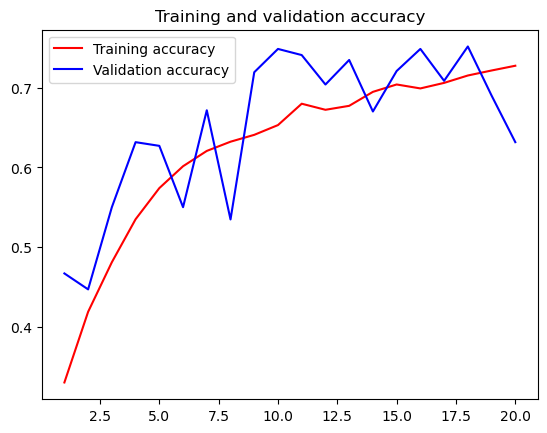

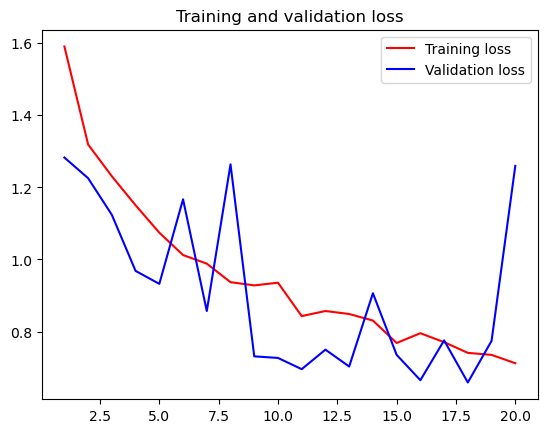

In [8]:
def plot_curves(hist):
    accuracy = hist.history["accuracy"]
    val_accuracy = hist.history["val_accuracy"]
    loss = hist.history["loss"]
    val_loss = hist.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, "r", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, "r", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()
    
# plot the curves for our base model
plot_curves(hist_8)

In [9]:
model_8.evaluate(test_ds)

11/11 [==============================] - 3s 275ms/step - loss: 1.2926 - accuracy: 0.6394


[1.292620062828064, 0.6394453048706055]

# Model- 9

In [10]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(64, (3, 3), activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(256, (3, 3), activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(512, (3, 3), activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_9 = keras.Model(inputs, outputs)

In [11]:
model_9.compile(loss="categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_9 = model_9.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
48/48 [==============================] - 92s 2s/step - loss: 1.6092 - accuracy: 0.3190 - val_loss: 1.4305 - val_accuracy: 0.3621
Epoch 2/20
48/48 [==============================] - 90s 2s/step - loss: 1.3534 - accuracy: 0.4170 - val_loss: 1.3683 - val_accuracy: 0.4068
Epoch 3/20
48/48 [==============================] - 90s 2s/step - loss: 1.2768 - accuracy: 0.5058 - val_loss: 1.2716 - val_accuracy: 0.4777
Epoch 4/20
48/48 [==============================] - 91s 2s/step - loss: 1.1903 - accuracy: 0.5217 - val_loss: 1.1777 - val_accuracy: 0.5331
Epoch 5/20
48/48 [==============================] - 89s 2s/step - loss: 1.0859 - accuracy: 0.5770 - val_loss: 1.0067 - val_accuracy: 0.6549
Epoch 6/20
48/48 [==============================] - 91s 2s/step - loss: 1.0333 - accuracy: 0.5883 - val_loss: 1.0829 - val_accuracy: 0.5886
Epoch 7/20
48/48 [==============================] - 89s 2s/step - loss: 0.9937 - accuracy: 0.6111 - val_loss: 1.0646 - val_accuracy: 0.6317
Epoch 8/20
48/48 [==

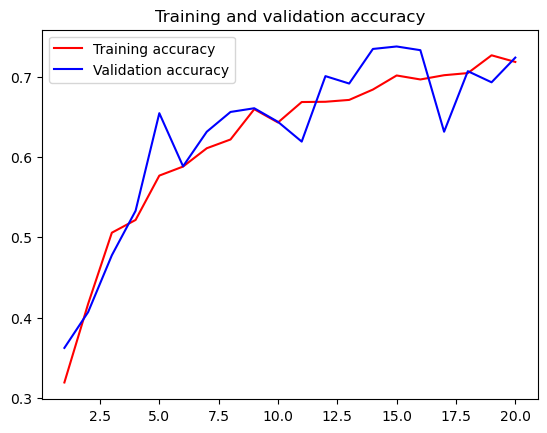

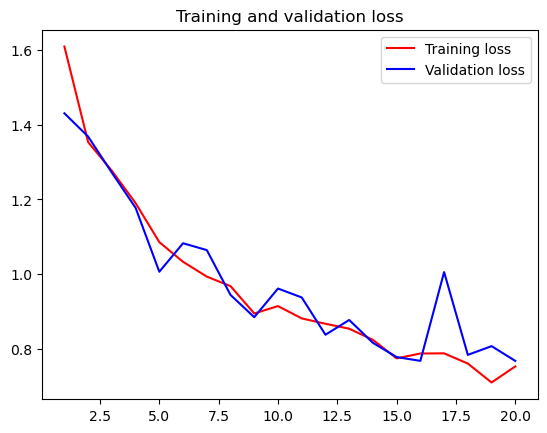

In [12]:
# plot the curves for our base model
plot_curves(hist_9)

In [13]:
model_9.evaluate(test_ds)

11/11 [==============================] - 3s 280ms/step - loss: 0.8108 - accuracy: 0.7088


[0.8107891082763672, 0.7087827324867249]

# Model - 10

In [42]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(32, (3, 3), activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(64, (3, 3), activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(256, (3, 3), activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(512, (3, 3), activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation = "relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_10 = keras.Model(inputs, outputs)

In [43]:
model_10.compile(loss="categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_10 = model_10.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
48/48 [==============================] - 201s 4s/step - loss: 1.7663 - accuracy: 0.3226 - val_loss: 1.3932 - val_accuracy: 0.4006
Epoch 2/20
48/48 [==============================] - 197s 4s/step - loss: 1.3535 - accuracy: 0.4223 - val_loss: 1.2292 - val_accuracy: 0.4361
Epoch 3/20
48/48 [==============================] - 193s 4s/step - loss: 1.2807 - accuracy: 0.4700 - val_loss: 1.2215 - val_accuracy: 0.5254
Epoch 4/20
48/48 [==============================] - 185s 4s/step - loss: 1.1604 - accuracy: 0.5399 - val_loss: 1.1143 - val_accuracy: 0.6040
Epoch 5/20
48/48 [==============================] - 191s 4s/step - loss: 1.0942 - accuracy: 0.5608 - val_loss: 1.1950 - val_accuracy: 0.4807
Epoch 6/20
48/48 [==============================] - 193s 4s/step - loss: 1.0109 - accuracy: 0.5979 - val_loss: 0.9527 - val_accuracy: 0.6256
Epoch 7/20
48/48 [==============================] - 191s 4s/step - loss: 0.9884 - accuracy: 0.6257 - val_loss: 0.9600 - val_accuracy: 0.6379
Epoch 8/20
48

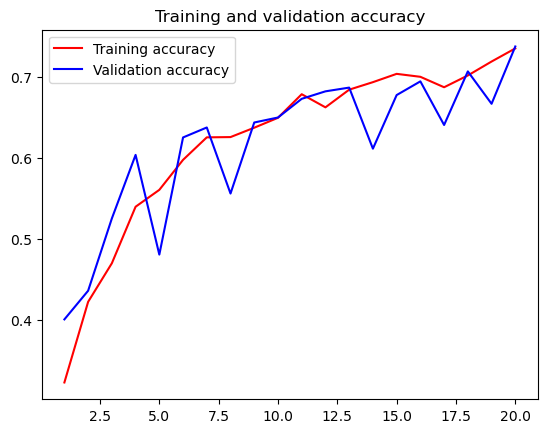

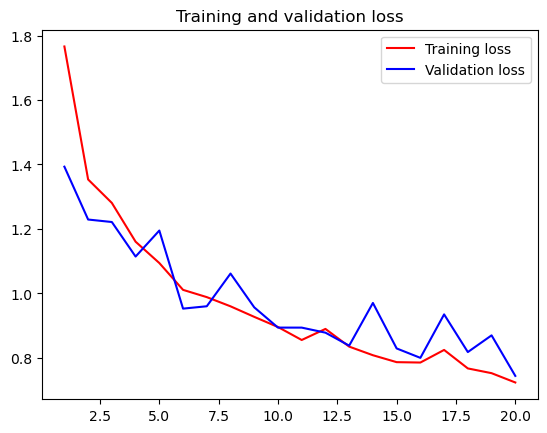

In [44]:
# plot the curves for our base model
plot_curves(hist_10)

In [45]:
model_10.evaluate(test_ds)

11/11 [==============================] - 7s 592ms/step - loss: 0.7748 - accuracy: 0.7057


[0.7748212218284607, 0.7057010531425476]